In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def system(r0, t, m=0.1, r=0.1, d=0.3, g=9.81, dpsi=400):
    I0 = 0.25 * m * r**2 + m * d**2
    Iz = 0.5 * m * r**2
    fi, psi, teta, dteta =r0

    pfi = Iz * dpsi * np.cos(np.pi / 4)
    dfi = (pfi - Iz * dpsi * np.cos(teta)) / (I0 * np.sin(teta)**2 + Iz * np.cos(teta)**2)

    dtetadt = (((dfi**2)*np.sin(teta)*np.cos(teta)*(I0 - Iz)) - (dfi * dpsi * Iz * np.sin(teta) + m * g * d * np.sin(teta))) / I0

    return np.array([dfi, dpsi, dteta, dtetadt])


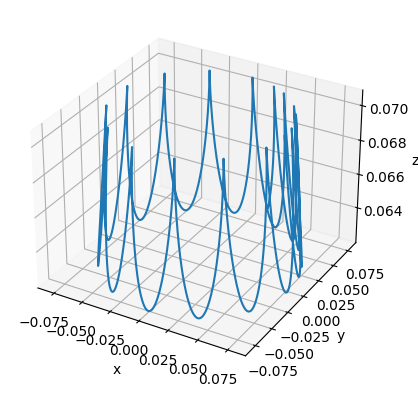

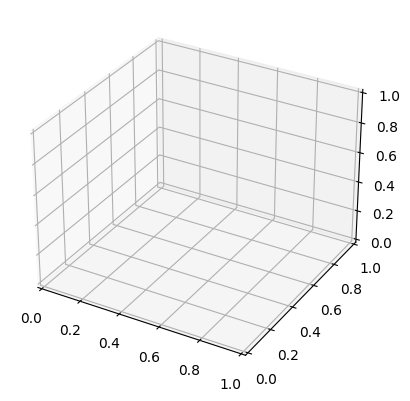

In [7]:

r0 = np.array([0., 0., np.pi / 4, 0])
t = np.linspace(0, 5, 10000)
solucion = odeint(system, r0, t)
r = 0.1
teta = solucion[:, 2]
fi = solucion[:, 0]

xsolucion = r * np.sin(teta) * np.cos(fi)
ysolucion = r * np.sin(teta) * np.sin(fi)
zsolucion = r * np.cos(teta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xsolucion, ysolucion, zsolucion)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [8]:
def Update(i):
    ax.clear()
    ax.set_title(r't %.3f' % (t1[i]))
    ax.plot(x[:i], y[:i], z[:i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

scale = 100
t1 = t[::scale]
x = xsolucion[::scale]
y = ysolucion[::scale]
z = zsolucion[::scale]

Animation = anim.FuncAnimation(fig, Update, frames=len(t1))
Animation.save('punto3.gif', writer='pillow')

In [9]:
x0, y0 = xsolucion[0], ysolucion[0]
periodo = []
tolerancia = 0.01

for i in range(15, len(t)):
    xactual, yactual = xsolucion[i], ysolucion[i]
    if abs(x0 - xactual) < tolerancia and abs(y0 - yactual) < tolerancia:
        periodo.append(t[i])

periodo_minimo = min(periodo)
periodo_minimo


0.007500750075007501

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
